# BEADs Dataset Exploration

This notebook explores the BEADs (Bias Evaluation Across Domains) dataset.

In [1]:
# Install required packages
# !pip install datasets pandas matplotlib seaborn transformers

In [2]:
# Authenticate with Hugging Face
import os
from dotenv import load_dotenv
from huggingface_hub import login

# Load environment variables
load_dotenv('../.env')

# Get token from environment
hf_token = os.getenv('HF_TOKEN')

if hf_token:
    login(token=hf_token)
    print("✓ Authenticated with Hugging Face")
else:
    print("Warning: HF_TOKEN not found in .env file")
    print("Please add your Hugging Face token to the .env file or login manually:")
    # Uncomment the line below to login interactively
    # login()

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


✓ Authenticated with Hugging Face


In [3]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Load BEADs Dataset

In [4]:
# Load the dataset with Full_Annotations config
# Available configs: 'Full_Annotations', '1-Text_Classification', '2-Token_Classification', 
# '3-Aspects', '4-Bias-Quantification-Demographics', '5-Language-Generation'

dataset = load_dataset("shainar/BEAD", "Full_Annotations")
print(f"Dataset structure: {dataset}")
print(f"\nAvailable splits: {list(dataset.keys())}")

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


Full.csv:   0%|          | 0.00/1.03G [00:00<?, ?B/s]

c:\Users\Ameen\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Ameen\.cache\huggingface\hub\datasets--shainar--BEAD. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Generating full split: 0 examples [00:00, ? examples/s]

Dataset structure: DatasetDict({
    full: Dataset({
        features: ['text', 'dimension', 'biased_words', 'aspect', 'label', 'sentiment', 'toxic', 'identity_mention'],
        num_rows: 3674927
    })
})

Available splits: ['full']


In [5]:
# Explore the splits
for split_name, split_data in dataset.items():
    print(f"\n{split_name}: {len(split_data)} examples")
    if len(split_data) > 0:
        print(f"Features: {split_data.features}")
        print(f"First example: {split_data[0]}")
        break


full: 3674927 examples
Features: {'text': Value('string'), 'dimension': Value('string'), 'biased_words': Value('string'), 'aspect': Value('string'), 'label': Value('string'), 'sentiment': Value('string'), 'toxic': Value('float64'), 'identity_mention': Value('string')}
First example: {'text': 'Where will this leave the kids??? That my friends, is the saddest part of all.  ', 'dimension': 'Ageism and sentiment', 'biased_words': '[]', 'aspect': 'Transphobia', 'label': 'Slightly Biased', 'sentiment': 'Negative', 'toxic': 0.0, 'identity_mention': 'NO'}


## 2. Data Analysis

In [6]:
# Convert to pandas for easier analysis
# Use the first available split
split_name = list(dataset.keys())[0]
df = pd.DataFrame(dataset[split_name])
print(f"Using split: {split_name}")
print(f"Dataset shape: {df.shape}")
print(f"\nColumn names: {df.columns.tolist()}")
df.head()

Using split: full
Dataset shape: (3674927, 8)

Column names: ['text', 'dimension', 'biased_words', 'aspect', 'label', 'sentiment', 'toxic', 'identity_mention']


,text,dimension,biased_words,aspect,label,sentiment,toxic,identity_mention
0,Where will this leave the kids??? That my frie...,Ageism and sentiment,[],Transphobia,Slightly Biased,Negative,0.0,NO
1,I had a feeling of impending doom &amp; then ...,Ageism and sentiment,"['impending', 'doom']",Climate change,Highly Biased,Negative,1.0,NO
2,I no feel good ..,Ageism and sentiment,[],Body-shaming,Neutral,Positive,0.0,NO
3,"Back in Hotlanta for a about a week, then off ...",Ageism and sentiment,[],Lifestyle,Slightly Biased,Negative,0.0,NO
4,Kids toys &amp; stamping stuff cleaned up... N...,Ageism and sentiment,[],Hobby,Neutral,Neutral,1.0,NO


In [7]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

Missing values:
text                     2
dimension                0
biased_words             0
aspect              177970
label                    0
sentiment                0
toxic                    0
identity_mention         0
dtype: int64


## 3. Bias Category Distribution

In [8]:
# Analyze bias categories if available
# This will depend on the actual structure of the BEADs dataset
# Adjust column names based on the actual dataset structure

if 'category' in df.columns:
    category_counts = df['category'].value_counts()
    
    plt.figure(figsize=(10, 6))
    category_counts.plot(kind='bar')
    plt.title('Bias Category Distribution')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## 4. Text Length Analysis

Text statistics:
        text_length    word_count
count  3.674925e+06  3.674925e+06
mean   2.110750e+02  3.613321e+01
std    2.938455e+02  4.895022e+01
min    1.000000e+00  0.000000e+00
25%    5.900000e+01  1.000000e+01
50%    1.090000e+02  1.900000e+01
75%    2.410000e+02  4.100000e+01
max    3.790300e+04  5.624000e+03


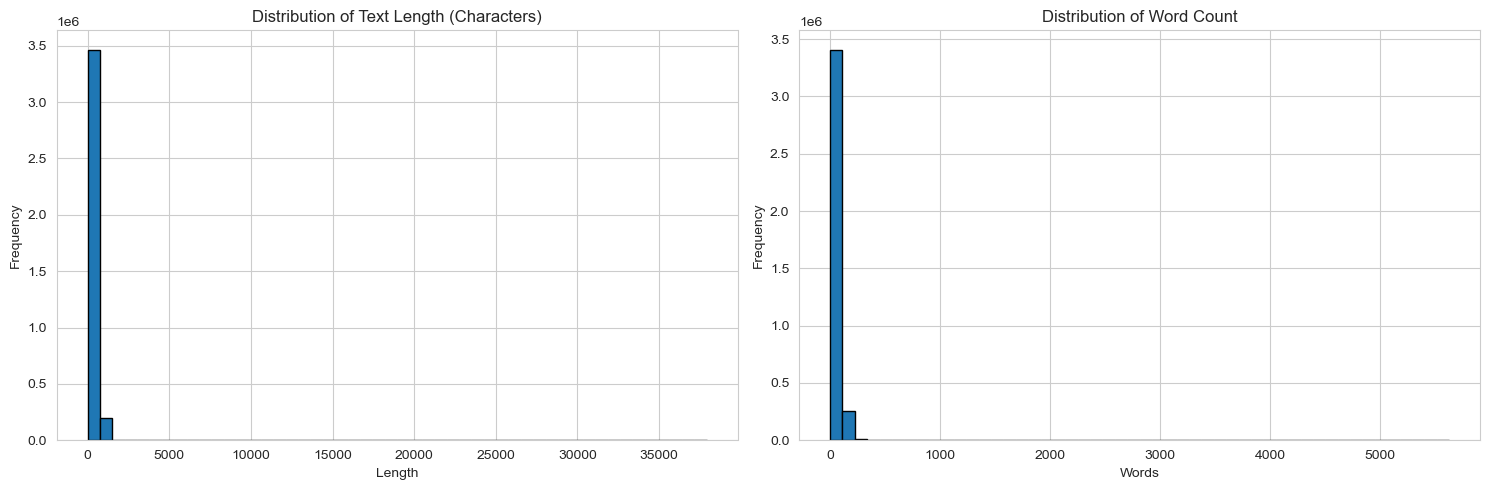

In [9]:
# Analyze text length
if 'text' in df.columns:
    df['text_length'] = df['text'].str.len()
    df['word_count'] = df['text'].str.split().str.len()
    
    print("Text statistics:")
    print(df[['text_length', 'word_count']].describe())
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    axes[0].hist(df['text_length'], bins=50, edgecolor='black')
    axes[0].set_title('Distribution of Text Length (Characters)')
    axes[0].set_xlabel('Length')
    axes[0].set_ylabel('Frequency')
    
    axes[1].hist(df['word_count'], bins=50, edgecolor='black')
    axes[1].set_title('Distribution of Word Count')
    axes[1].set_xlabel('Words')
    axes[1].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

## 5. Sample Examples

In [10]:
# Display sample examples
print("Sample examples from the dataset:\n")
for i in range(min(5, len(df))):
    print(f"Example {i+1}:")
    print(df.iloc[i])
    print("-" * 80)

Sample examples from the dataset:

Example 1:
text                Where will this leave the kids??? That my frie...
dimension                                        Ageism and sentiment
biased_words                                                       []
aspect                                                    Transphobia
label                                                 Slightly Biased
sentiment                                                    Negative
toxic                                                             0.0
identity_mention                                                   NO
text_length                                                      80.0
word_count                                                       15.0
Name: 0, dtype: object
--------------------------------------------------------------------------------
Example 2:
text                 I had a feeling of impending doom &amp; then ...
dimension                                        Ageism and sentiment

## 6. Export Processed Data

In [11]:
# Save processed data
import os

output_path = '../data/processed/beads_processed.csv'
os.makedirs(os.path.dirname(output_path), exist_ok=True)
df.to_csv(output_path, index=False)
print(f"Processed data saved to: {output_path}")

Processed data saved to: ../data/processed/beads_processed.csv


## 7. Next Steps

1. Implement lexicon-based bias detection
2. Fine-tune transformer models
3. Evaluate detection performance
4. Compare across different bias categories